### Linear function

y = (a1 * x) + (a2)


y = (a1 *x1) + (a2 * x2) --- x2 =1 -- This is a dot product


We will have a lots of equations for y for each point on the curve

This would be a matrix of a1, x1, a2 -- the dot product would be matrix product


Tensor means array -- of all the columns and rows should be of same length ex: 4 x 3 is a sensor

Image is generally a Rank 3 sensor - 3D



In [5]:
%matplotlib inline
from fastai.basics import *

### Generate some data

In [6]:
n = 100

In [7]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.8570,  1.0000],
        [ 0.7096,  1.0000],
        [-0.9387,  1.0000],
        [-0.2396,  1.0000],
        [ 0.8882,  1.0000]])

x is a rank 2 tensor with n rows and 2 columns 

In the second line, we have changed the first column

In pytorch, uniform_ is used for replacement of the variables

#### coefficients a1 = 3, a2 = 2

In [10]:
a = tensor(3.,2)

This is a rank 1 tensor

In [11]:
a

tensor([3., 2.])

In python x@a is the matrix vector product

In [12]:
y = x@a + torch.rand(n)

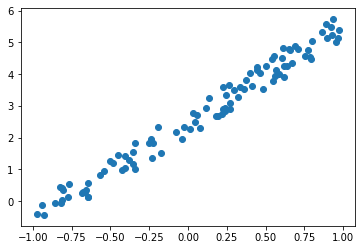

In [13]:
plt.scatter(x[:,0],y)

### Loss function

In [15]:
def mse(y_hat, y):
    return ((y_hat-y)**2).mean()

Random guess of a = [-1.0,1]

In [16]:
a = tensor(-1.,1)

In [17]:
y_hat = x@a
mse(y_hat, y)

tensor(8.7057)

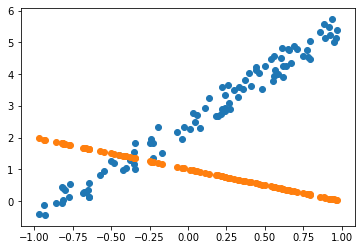

In [18]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

## Gradient descent

Minimze the loss function

In [25]:
a = nn.Parameter(a)

In [26]:
a


Parameter containing:
tensor([3.0129, 2.4841], requires_grad=True)

In [43]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

The loop goes throug 100 times. as shown below

the mse is calculated, 

For every 10 times it prints the loss


In pytorch .backward --- the derivate is calulated

In pytorch to calculate the store the gradient val with grad


weights are updated as w = w - gradient *LR , wehere gradient is (d(loss func)/d(w))

In [44]:
lr = 1e-1
for t in range(100): update()

tensor(8.7057, grad_fn=<MeanBackward0>)
tensor(1.3431, grad_fn=<MeanBackward0>)
tensor(0.4020, grad_fn=<MeanBackward0>)
tensor(0.1624, grad_fn=<MeanBackward0>)
tensor(0.0987, grad_fn=<MeanBackward0>)
tensor(0.0817, grad_fn=<MeanBackward0>)
tensor(0.0772, grad_fn=<MeanBackward0>)
tensor(0.0760, grad_fn=<MeanBackward0>)
tensor(0.0757, grad_fn=<MeanBackward0>)
tensor(0.0756, grad_fn=<MeanBackward0>)


In [45]:
y_hat1 = x@a

In [46]:
y_hat1

tensor([-9.8042e-02,  4.6222e+00, -3.4414e-01,  1.7622e+00,  5.1602e+00,
         7.6720e-01,  5.3501e+00,  3.1177e-02,  5.1246e-01,  3.8218e+00,
         4.1849e+00,  3.2162e+00,  4.3051e+00, -4.4435e-01,  1.4148e-02,
         9.6375e-01,  1.2532e+00,  1.7952e+00,  3.7275e+00,  3.9441e+00,
         5.4848e-01,  4.1119e+00,  3.3819e+00,  4.5034e+00,  1.4812e-01,
         3.1551e+00,  3.4946e+00,  2.3584e+00,  2.6200e+00,  2.5277e+00,
         4.3347e+00,  1.9658e+00,  3.4638e+00,  2.4072e+00,  4.4479e+00,
         3.0711e+00,  3.8159e+00,  1.4480e+00,  1.7291e+00,  1.4244e+00,
         1.2662e+00,  3.1400e+00,  4.5654e+00,  1.4454e+00,  3.8767e+00,
         3.2096e+00,  3.2041e+00,  5.4285e-01,  2.7169e+00,  2.7015e-03,
         1.7909e+00,  5.0815e+00,  4.4414e-01,  4.8198e+00,  4.1432e+00,
         5.3935e+00,  2.8264e+00,  4.4615e+00,  4.8776e+00,  3.0294e+00,
         2.2597e+00,  5.2752e+00,  4.2552e+00,  4.8438e+00,  4.3486e+00,
         1.4202e+00,  4.1631e+00,  3.2789e+00,  3.2

In [47]:
y_hat1 = y_hat1.tolist()

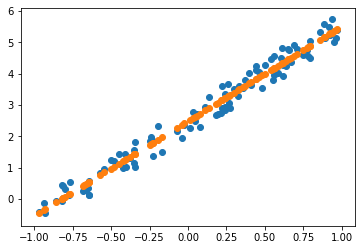

In [48]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat1);

## Stochastic gradient descent -- calls for mini batches

For huge datasets -- we use mini batches-- based on the size of the minibatch, some random images are picked up. 

Then using those random images the mse is calcualted. 

The loop continues for each of the mini batch

Learning Rate --- multiply the gradient to update the weights

Epoch -- one complete run for all the images
for non stoc gradient -- we run through all the images -- lots of epochs, we look at the image lot of times.. chance of overfitting


minibatch -- in stochastic grad, the size to pick the data randomly


Architecture/model is the same thing -- mathematical function we fit the paramters to -- ex: resnet34, linear regression


Paramters or coefficients or weights -- numbers updating


Loss function---  how far away or close to the true value

REGULARIZATION AVOIDS OVERFITTING